In [1]:
# Import the relevant libraries 
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
%matplotlib inline
plt.rc("font", size=14)
import seaborn as sns
sns.set()
sns.set(style="whitegrid", color_codes=True)

from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans 

import pickle

In [2]:
# Load the dataset
purchase_df = pd.read_csv('purchase data.csv', index_col = 0)

purchase_df.head() # Glance at the first dataset(1)

,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,,,,,,,,,,,,,,,
200000001,1,0,0,0,0,0,1.59,1.87,2.01,2.09,...,0,0,0,0,0,47,1,110866,1,0
200000001,11,0,0,0,0,0,1.51,1.89,1.99,2.09,...,0,0,0,0,0,47,1,110866,1,0
200000001,12,0,0,0,0,0,1.51,1.89,1.99,2.09,...,0,0,0,0,0,47,1,110866,1,0
200000001,16,0,0,0,0,0,1.52,1.89,1.98,2.09,...,0,0,0,0,0,47,1,110866,1,0
200000001,18,0,0,0,0,0,1.52,1.89,1.99,2.09,...,0,0,0,0,0,47,1,110866,1,0


In [3]:
purchase_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58693 entries, 200000001 to 200000500
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Day                58693 non-null  int64  
 1   Incidence          58693 non-null  int64  
 2   Brand              58693 non-null  int64  
 3   Quantity           58693 non-null  int64  
 4   Last_Inc_Brand     58693 non-null  int64  
 5   Last_Inc_Quantity  58693 non-null  int64  
 6   Price_1            58693 non-null  float64
 7   Price_2            58693 non-null  float64
 8   Price_3            58693 non-null  float64
 9   Price_4            58693 non-null  float64
 10  Price_5            58693 non-null  float64
 11  Promotion_1        58693 non-null  int64  
 12  Promotion_2        58693 non-null  int64  
 13  Promotion_3        58693 non-null  int64  
 14  Promotion_4        58693 non-null  int64  
 15  Promotion_5        58693 non-null  int64  
 16  Sex       

# We will use the segemnation model for creating the clusters

In [4]:
features = purchase_df[['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']]

In [5]:
scaler = pickle.load(open('models/scaler.pickle', 'rb'))
pca = pickle.load(open('models/pca.pickle', 'rb'))
model_kmeans = pickle.load(open('models/model_kmeans.pickle', 'rb'))

In [6]:
scaled_df=scaler.transform(features)

In [7]:
pca_df = pca.transform(scaled_df)

In [8]:
clusters=model_kmeans.predict(pca_df)

In [9]:
purchase_seg_df=purchase_df.copy()

In [10]:
purchase_seg_df['Segments']=clusters

In [11]:
purchase_seg_df.T

ID,200000001,200000001,200000001,200000001,200000001,200000001,200000001,200000001,200000001,200000001,...,200000500,200000500,200000500,200000500,200000500,200000500,200000500,200000500,200000500,200000500
Day,1.00,11.00,12.00,16.00,18.00,23.00,28.00,37.00,41.00,43.00,...,681.00,689.00,693.00,694.00,697.00,703.00,710.00,717.00,722.00,726.00
Incidence,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00
Brand,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,2.00,0.00
Quantity,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,6.00,0.00,0.00,0.00,3.00,0.00
Last_Inc_Brand,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,2.00
Last_Inc_Quantity,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00
Price_1,1.59,1.51,1.51,1.52,1.52,1.50,1.50,1.50,1.35,1.35,...,1.42,1.50,1.42,1.42,1.42,1.41,1.36,1.50,1.51,1.51
Price_2,1.87,1.89,1.89,1.89,1.89,1.90,1.90,1.90,1.58,1.58,...,1.85,1.87,1.51,1.51,1.51,1.85,1.84,1.80,1.82,1.82
Price_3,2.01,1.99,1.99,1.98,1.99,1.99,1.99,1.99,1.97,1.97,...,2.06,2.06,2.02,2.02,1.97,2.01,2.09,2.14,2.09,2.09
Price_4,2.09,2.09,2.09,2.09,2.09,2.09,2.09,2.09,2.09,2.09,...,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24


In [12]:
demo_df=pd.DataFrame(scaled_df,columns=features.columns)

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def snake_plot(data, cluster_column):
    clusters = data[cluster_column].unique()
    
    # Set up the plot
    plt.figure(figsize=(10, 6))
    
    # Define a custom color palette
    colors = sns.color_palette("husl", n_colors=len(clusters))
    
    for i, cluster in enumerate(clusters):
        cluster_data = data[data[cluster_column] == cluster].drop(columns=[cluster_column])  # Exclude the cluster label column
        cluster_mean = cluster_data.mean()
        plt.plot(cluster_mean, label=f'Cluster {cluster}', marker='o', color=colors[i])
    
    # Customize the plot
    plt.title('Snake Plot')
    plt.xlabel('Features')
    plt.ylabel('Feature Values')
    plt.xticks(rotation=45, ha="right", fontsize=10)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    
    plt.tight_layout()
    plt.show()

In [14]:
demo_df['cluster']=clusters

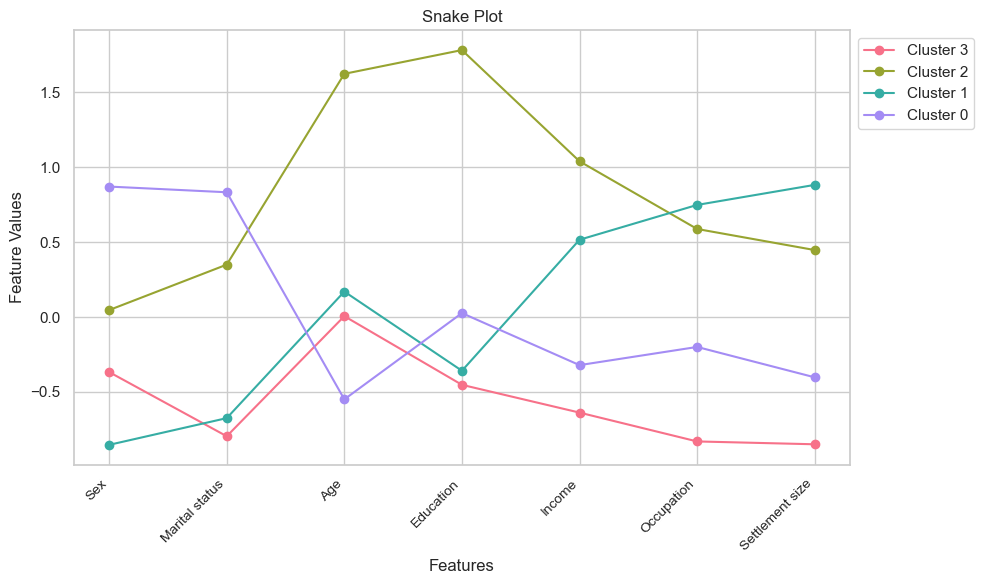

In [15]:
snake_plot(demo_df,'cluster')

In [16]:
#Cluster 0 : men,married,low_age,masters degree,Medium income,avg occupation status,average settlement size    Standard
#cluster 1 : female,single,medium age,bachelors,higher income,highest occupation,highest settlement            Premium  
#cluster 2 :combo,married,high age,high eductaion,high income ,higher occupation,higher settelemtent           Gold
#cluster 3: female,single,medium age,under grad,low income ,low occupation,low settlement size                 Bronze


 Descriptive Analysis by Segments
 
In this section, I focus on descriptive analysis of the purchase data by individuals and then by segments to gain insight into customer shopping habits.

*  The Proportion of each Segment
*  Purchase Occasions and Purchase Incidences: How often each segment group go shopping?
*  Brand Choice: Which brand of products the customers purchase?
*  Revenue Comparison between segments: How much money they spend?
* Holistic View of Each Segements


In purchasing a product a consumer basically makes two decisions: 

when does he buy a product of a certain product class (purchase incidence) 

which brand does he buy (brand choice)

In [17]:
final_df=purchase_seg_df.reset_index().copy()
purchase_seg_df['Segments'].value_counts()

3    21495
1    13580
0    12123
2    11495
Name: Segments, dtype: int64

In [18]:
purchase_seg_df.index.duplicated().sum()

58193

In [19]:
traffic_freq = final_df[['ID','Incidence']].groupby(['ID']).count().rename(columns={"Incidence":"N_Visits"})
purchase_freq = final_df[['ID','Incidence']].groupby(['ID']).sum().rename(columns={"Incidence":"Purchase_Freq"})
result=pd.concat([traffic_freq,purchase_freq],ignore_index=False,axis=1)
result['Avg_purchase']=result['Purchase_Freq']/result['N_Visits']
segm_info = final_df[['ID', 'Segments']].groupby(['ID']).mean().round()
result.head()
purchase_descr = result.merge(segm_info,on="ID",how="left")
purchase_descr.head()

,N_Visits,Purchase_Freq,Avg_purchase,Segments
ID,,,,
200000001,101,9,0.089109,3.0
200000002,87,11,0.126437,2.0
200000003,97,10,0.103093,3.0
200000004,85,11,0.129412,3.0
200000005,111,13,0.117117,1.0


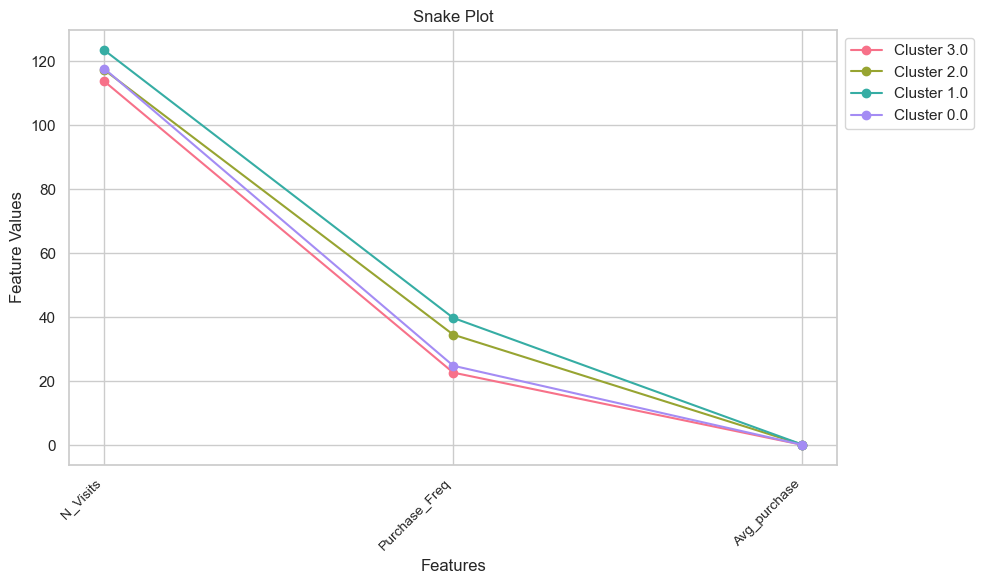

In [20]:
snake_plot(purchase_descr,'Segments')

In [21]:
segm_prop = purchase_descr[['N_Visits', 'Segments']].groupby(['Segments']).count() / purchase_descr.shape[0]
segm_prop.reset_index(inplace=True)
maps={0:"Standard",1:"Platinum",2:"Gold",3:"Bronze"}
segm_prop['Segments']=segm_prop['Segments'].map(maps)
segm_prop

,Segments,N_Visits
0,Standard,0.206
1,Platinum,0.220
2,Gold,0.196
3,Bronze,0.378


In [22]:
import seaborn as sn

Text(0.5, 1.0, 'Average Proportion of Purchases by Segment')

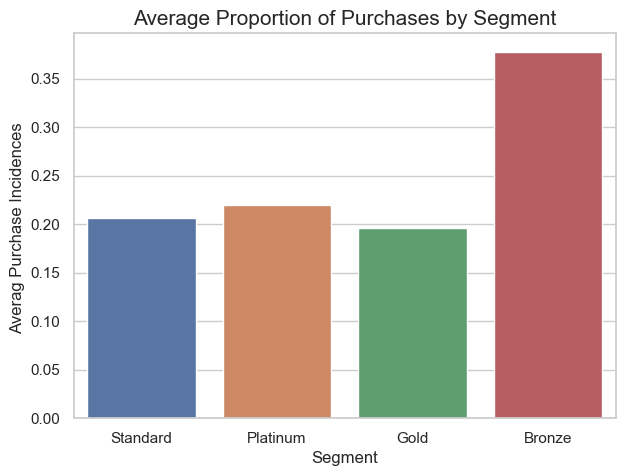

In [23]:
plt.figure(figsize=[7,5])
sn.barplot(data = segm_prop, x = 'Segments', y = 'N_Visits')
plt.xlabel('Segment', fontsize = 12)
plt.ylabel('Averag Purchase Incidences ', fontsize = 12)
plt.title('Average Proportion of Purchases by Segment', fontsize = 15)

In [24]:
purchase_descr['Segments']=purchase_descr['Segments'].map(maps)

In [38]:
segments_mean=purchase_descr.groupby("Segments").mean().reset_index()
segments_mean

,Segments,N_Visits,Purchase_Freq,Avg_purchase
0,Bronze,113.730159,22.756614,0.201588
1,Gold,117.295918,34.602041,0.284478
2,Platinum,123.454545,39.827273,0.283102
3,Standard,117.699029,24.902913,0.212773


In [27]:
# Calculate the standard deviation by segments. It determines how homogoneus each of the segments is.
segments_std = purchase_descr.groupby(['Segments']).std()
segments_std 

,N_Visits,Purchase_Freq,Avg_purchase
Segments,,,
Bronze,16.410498,13.815040,0.120335
Gold,20.716152,25.900579,0.171787
Platinum,44.864656,53.744530,0.200056
Standard,19.039605,16.774464,0.126603


In [34]:
segments_mean.Avg_purchase

Segments
Bronze      0.201588
Gold        0.284478
Platinum    0.283102
Standard    0.212773
Name: Avg_purchase, dtype: float64

Text(0.5, 1.0, 'Average Proportion of Purchases by Segment')

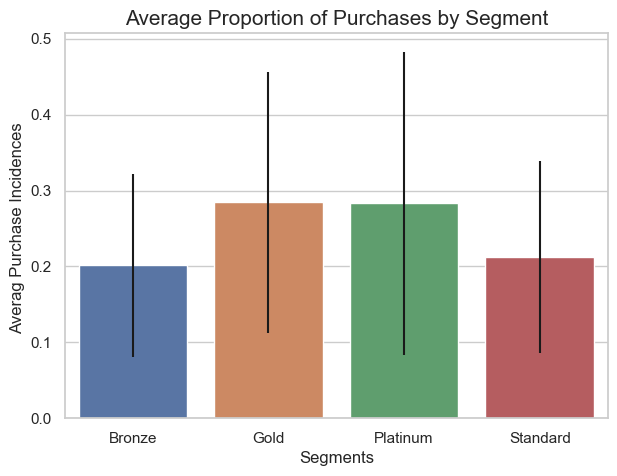

In [41]:
# Plot the average proportion of purchases.
avg_N_Purchase_in_percentage = segments_mean.Avg_purchase*100
plt.figure(figsize=[7,5])
sns.barplot(data = segments_mean, x = 'Segments', y = 'Avg_purchase',yerr = segments_std['Avg_purchase'])
plt.xlabel('Segments', fontsize = 12)
plt.ylabel('Averag Purchase Incidences ', fontsize = 12)
plt.title('Average Proportion of Purchases by Segment', fontsize = 15)

## Brand Choice
Now we come to the question: Which brand is the customer going to choose? I focused on the observations only where customers have bought at least one product.

In [43]:
# Select only rows where incidence is 1. This means that I filtered the times a purchase was made.
purchase_incidence = purchase_seg_df.query('Incidence ==1')
print(purchase_incidence.shape)
purchase_incidence.head(3)

(14638, 24)


,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segments
ID,,,,,,,,,,,,,,,,,,,,,
200000001,28,1,2,2,0,0,1.50,1.9,1.99,2.09,...,0,0,0,0,47,1,110866,1,0,3
200000001,58,1,5,1,0,0,1.39,1.9,1.91,2.12,...,0,1,0,0,47,1,110866,1,0,3
200000001,110,1,1,2,0,0,1.47,1.9,1.99,1.97,...,1,0,0,0,47,1,110866,1,0,3


In [49]:
brand_dummies = pd.get_dummies(purchase_incidence['Brand'], prefix = 'Brand', prefix_sep = '_')
brand_dummies['Segments'] = purchase_incidence['Segments']
brand_dummies.head()

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,Segments
ID,,,,,,
200000001,0,1,0,0,0,3
200000001,0,0,0,0,1,3
200000001,1,0,0,0,0,3
200000001,0,0,0,1,0,3
200000001,0,1,0,0,0,3


In [53]:
brand_ID = brand_dummies.groupby(['ID'], as_index = True).mean()
print(brand_ID.head(3))
mean_brand_segment = brand_ID.groupby(['Segments'], as_index = True).mean() 
mean_brand_segment.head()

            Brand_1   Brand_2  Brand_3   Brand_4   Brand_5  Segments
ID                                                                  
200000001  0.111111  0.444444      0.0  0.222222  0.222222       3.0
200000002  0.000000  0.090909      0.0  0.909091  0.000000       2.0
200000003  0.000000  0.800000      0.0  0.000000  0.200000       3.0


,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5
Segments,,,,,
0.0,0.251186,0.396502,0.156481,0.059474,0.136357
1.0,0.072871,0.146808,0.039976,0.112395,0.627951
2.0,0.041928,0.117422,0.030610,0.613623,0.196417
3.0,0.137567,0.681190,0.020923,0.061548,0.098772


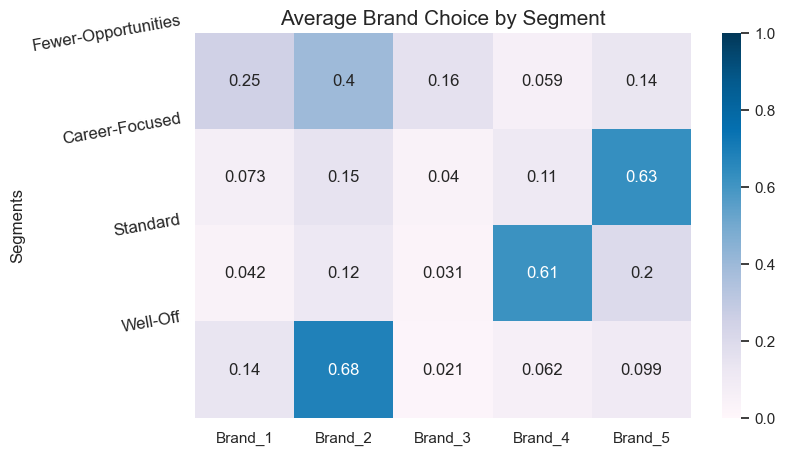

In [54]:
plt.figure(figsize=[8,5])
sns.heatmap(mean_brand_segment, vmin = 0, vmax = 1, cmap = 'PuBu', annot = True)
plt.yticks([0, 1, 2, 3], ['Fewer-Opportunities', 'Career-Focused', 'Standard', 'Well-Off'], rotation = 10, fontsize = 12)
plt.title('Average Brand Choice by Segment', fontsize = 15)
plt.show()

In [56]:
import os
from pathlib import Path
import logging 

logging.basicConfig(level=logging.INFO,
                format='[%(asctime)s]: %(message)s:')

project_name ="Customer_Segementation"

list_of_files = [
    f"src/{project_name}/__init__.py",
    f"src/{project_name}/components/__init__.py",
    f"src/{project_name}/utils/__init__.py",
    f"src/{project_name}/utils/common.py",
    f"src/{project_name}/config/__init__.py",
    f"src/{project_name}/config/configuration.py",
    f"src/{project_name}/pipeline/__init__.py",
    f"src/{project_name}/entity/__init__.py",
    f"src/{project_name}/entity/config_entity.py",
    f"src/{project_name}/constants/__init__.py",
    f"src/{project_name}/exception/exception.py",
    f"src/{project_name}/exception/__init__.py",
    f"src/{project_name}/logger/__init__.py"
    "config/config.yaml",
    "params.yaml",
    "schema.yaml",
    "main.py",
    "app.py",
    "requirements.txt",
    "setup.py",
    "research/trials.ipynb",
    "templates/index.html"

]

In [60]:
for file in list_of_files:
    filepath=Path(file)

    filedir,filename=os.path.split(filepath)
    print(filedir," howndy  ",filename)

src\Customer_Segementation  howndy   __init__.py
src\Customer_Segementation\components  howndy   __init__.py
src\Customer_Segementation\utils  howndy   __init__.py
src\Customer_Segementation\utils  howndy   common.py
src\Customer_Segementation\config  howndy   __init__.py
src\Customer_Segementation\config  howndy   configuration.py
src\Customer_Segementation\pipeline  howndy   __init__.py
src\Customer_Segementation\entity  howndy   __init__.py
src\Customer_Segementation\entity  howndy   config_entity.py
src\Customer_Segementation\constants  howndy   __init__.py
src\Customer_Segementation\exception  howndy   exception.py
src\Customer_Segementation\exception  howndy   __init__.py
src\Customer_Segementation\logger\__init__.pyconfig  howndy   config.yaml
  howndy   params.yaml
  howndy   schema.yaml
  howndy   main.py
  howndy   app.py
  howndy   requirements.txt
  howndy   setup.py
research  howndy   trials.ipynb
templates  howndy   index.html
